<a href="https://colab.research.google.com/github/thaohung13/AI_W11_14_4_2023/blob/main/AI_W11_14_4_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from numpy.ma.core import reshape
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
#LeakyReLU  #ham truyen
from keras.optimizers import Adam#bo toi uu toc do hoc 0.01
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [15]:
x_train =x_train.reshape(60000,28,28,1)
x_test =x_test.reshape(10000,28,28,1)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


Vật này là:  1


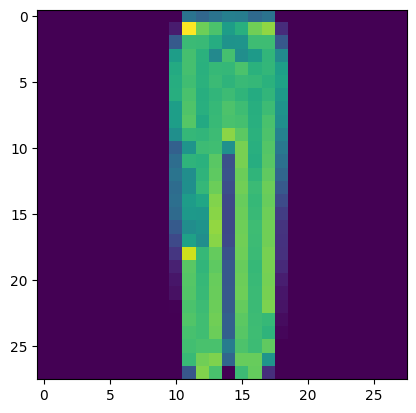

In [16]:
digit = x_train[1000]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('Vật này là: ', y_train[1000])

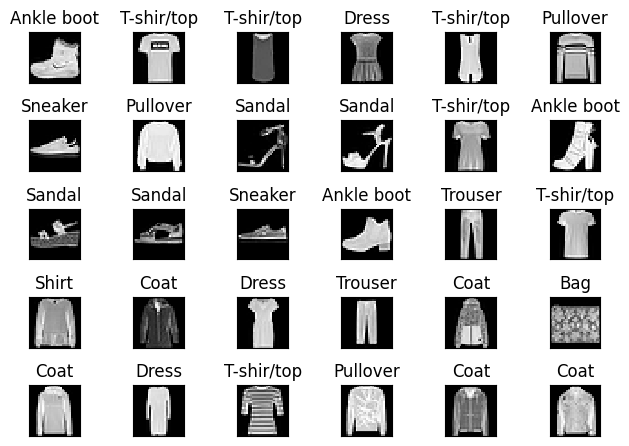

In [17]:
class_name = [ "T-shir/top" ,"Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(30): 
  plt.subplot(5,6,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('{}'.format(class_name[y_train[i]]))
  plt.xticks([])
  plt.yticks([])
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [18]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


In [19]:
#VGG
model = Sequential()
#Lần tích chập 1
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))#32: số lần tích chập
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#Lần tích chập 2
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add (MaxPooling2D((2,2),padding='same'))
#Lần tích chập 1
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [20]:

batch_size=64
epochs = 20     #số lần học
classes = 10    #phân loại
model.add(Flatten())
model.add (Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [21]:
from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
train=model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs, verbose=1)#verbose=1 -> hiển thị quá trình học ra(=0 thì không hiển thị)

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.4337 - accuracy: 0.8437
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2723 - accuracy: 0.8996
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2288 - accuracy: 0.9159
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1971 - accuracy: 0.9273
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1750 - accuracy: 0.9346
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1502 - accuracy: 0.9440
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1317 - accuracy: 0.9501
Epoch 8/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1113 - accuracy: 0.9582
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0959 - accuracy: 0.9644
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0822 - accuracy: 0.9684

In [22]:
model.save('model1.h5')

<function matplotlib.pyplot.show(close=None, block=None)>

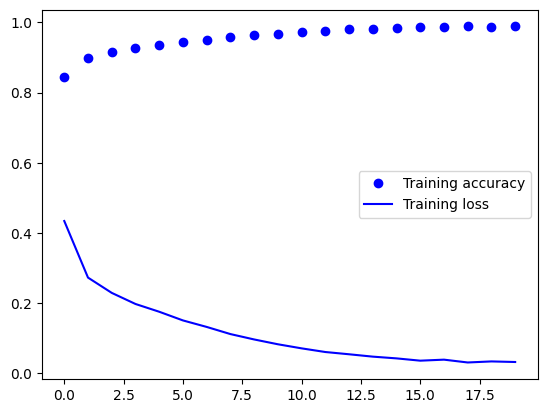

In [23]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label = 'Training accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.legend()
plt.show